## **TASK - 3**

## 🏦 Bank Marketing Dataset — Decision Tree Classifier 🌳

## 📚 Import Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

## 📥 Load Dataset

In [6]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')

##🔎 Initial Data Exploration

In [7]:
# Display the first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Display the last few rows
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
print("🔍 Dataset Shape:", df.shape)

🔍 Dataset Shape: (41188, 21)


In [10]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


## 🔍 Viewing Dataset Information

In [11]:
# View Dataset Info
print("🔎 Dataset Information:\n")
df.info()

🔎 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.co

In [12]:
#Summary Statistics
print("\n📊 Dataset Description:\n")
print(df.describe())


📊 Dataset Description:

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.

## 🔁 Transform Categorical & Target Variables 🎯

In [13]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

# Convert target to binary (yes → 1, no → 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

## 🧠 Encoding Categorical Features

In [14]:
# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [15]:
# Check categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("🧾 Categorical columns:", categorical_cols.tolist())

🧾 Categorical columns: []


## 🎯Split Features and Target

In [16]:
# features and target
X = df.drop('y', axis=1)
y = df['y']

## ✂️ Split into Training and Testing Sets

In [17]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌳 Train Decision Tree Classifier

In [18]:
# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 🧩 Feature 🔍Importance Plot

In [19]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

In [20]:
# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

<ipython-input-21-7d4931c411e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')
<ipython-input-21-7d4931c411e4>:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


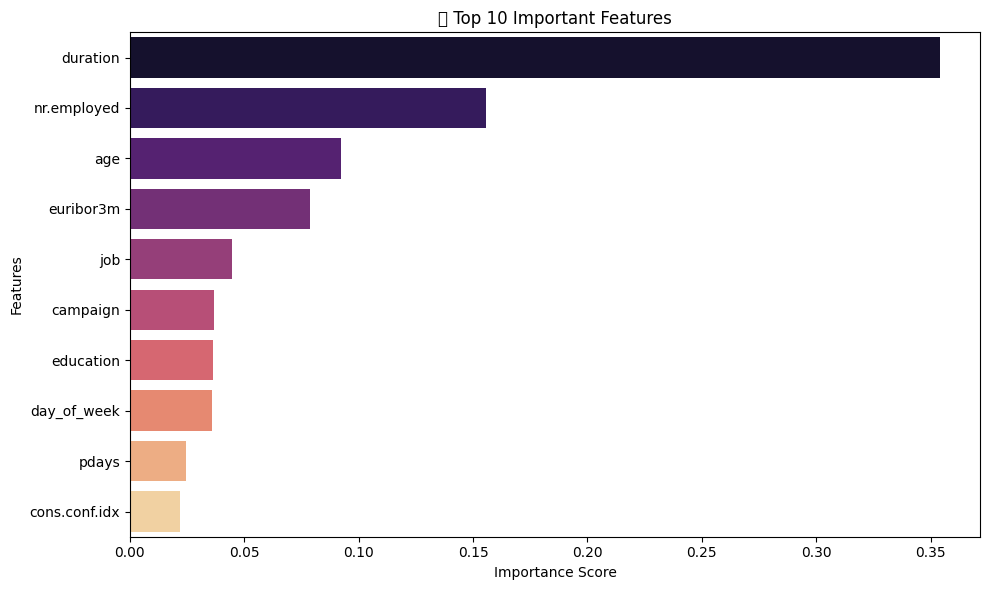

In [21]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')
plt.title('🔥 Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## 📈 Make Predictions

In [22]:
# Predict on test set
y_pred = model.predict(X_test)

## 🎯Evaluate the Model

In [23]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 88.94%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



## 📊 Visualize the Decision Tree 🌳

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


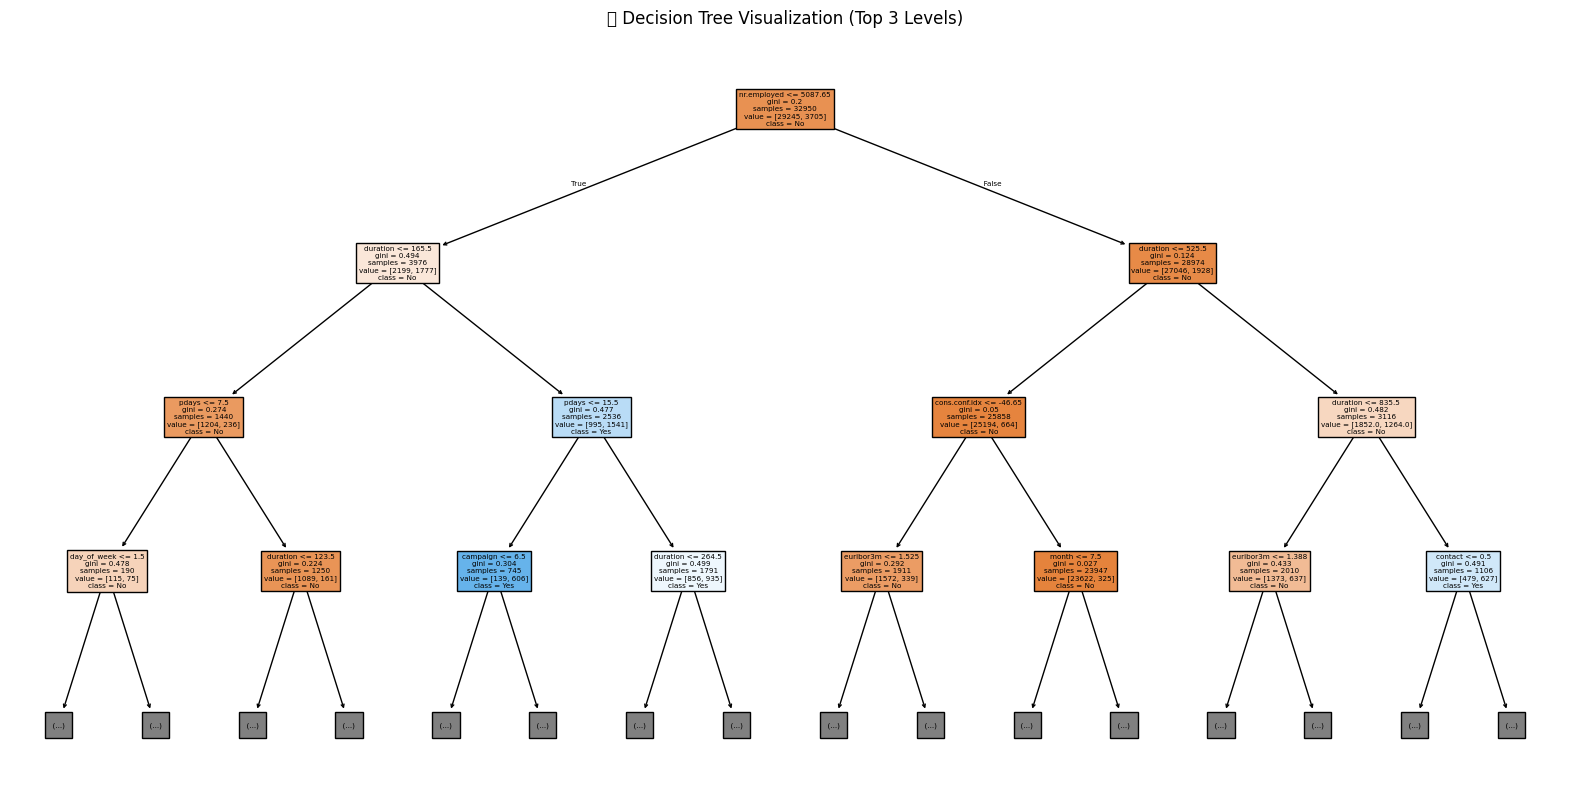

In [24]:
from sklearn.tree import plot_tree  # ✅ Add this line

# 🌳 Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("🌳 Decision Tree Visualization (Top 3 Levels)")
plt.show()

## 📝 Conclusion and Key Insights

In [25]:
# CONCLUSION 📊📌

print("✅ CONCLUSION 🧾")
print("\nIn this project, we built a Decision Tree Classifier using the Bank Marketing dataset to predict whether a customer will subscribe to a term deposit.\n")

print("🔧 Key Steps:")
print("• Data Preprocessing and Cleaning")
print("• Encoding Categorical Features using One-Hot Encoding")
print("• Splitting the data into Training and Testing Sets")
print("• Training a Decision Tree Classifier")
print("• Evaluating Model Performance using Accuracy, Classification Report, and Confusion Matrix")
print("• Visualizing the Top 3 Levels of the Decision Tree")

# Accuracy already calculated earlier — reuse the accuracy_score result
print(f"\n📈 Model Accuracy on Test Data: {accuracy:.2f}")

print("\n💡 Insight:")
print("The model reveals important features like job type, contact method, and previous marketing outcomes that influence whether a customer subscribes.")
print("This can help banks better target customers in future campaigns.")

print("\n📁 Dataset Source:")
print("Bank Marketing Dataset from Kaggle: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing")

print("\n🎯 This project demonstrates how Decision Trees can be used for classification and customer targeting tasks in marketing.")


✅ CONCLUSION 🧾

In this project, we built a Decision Tree Classifier using the Bank Marketing dataset to predict whether a customer will subscribe to a term deposit.

🔧 Key Steps:
• Data Preprocessing and Cleaning
• Encoding Categorical Features using One-Hot Encoding
• Splitting the data into Training and Testing Sets
• Training a Decision Tree Classifier
• Evaluating Model Performance using Accuracy, Classification Report, and Confusion Matrix
• Visualizing the Top 3 Levels of the Decision Tree

📈 Model Accuracy on Test Data: 0.89

💡 Insight:
The model reveals important features like job type, contact method, and previous marketing outcomes that influence whether a customer subscribes.
This can help banks better target customers in future campaigns.

📁 Dataset Source:
Bank Marketing Dataset from Kaggle: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

🎯 This project demonstrates how Decision Trees can be used for classification and customer targeting tasks in marketin